In [1]:
import pandas as pd

# Load the cleaned dataset

# Replace 'cleaned_dataset.csv' with the path to your cleaned dataset
data = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows of the dataset
data.head()

,Report ID,Report Version,Make,Model,Model Year,Same Vehicle ID,Mileage,ADS Equipped?,Automation System Engaged?,Incident Date,...,Crash With,Highest Injury Severity Alleged,Property Damage?,SV Pre-Crash Movement,SV Any Air Bags Deployed?,SV Precrash Speed (MPH),Source Dataset,CP Contact Area,Weather,SV Contact Area
0,30410-3043,1,Hyundai,Ioniq 5,2022-01-01 00:00:00,Missing,6742.0,Yes,ADS,2022-05-01,...,"Other, see Narrative",No Injuries Reported,No,Proceeding Straight,No,8.0,ADS,Missing,Weather - Clear,SV Contact Area - Front Left
1,13781-3301,2,Tesla,Model 3,2021-01-01 00:00:00,bfdb35901b2efda,23108.0,No,ADAS,2022-07-01,...,Other Fixed Object,Unknown,Yes,Proceeding Straight,No,20.0,ADAS,Missing,Weather - Clear,"SV Contact Area - Front Left, SV Contact Area ..."
2,13781-5973,1,Tesla,Model 3,2018-01-01 00:00:00,05853ab9f48d962,35575.0,No,ADAS,2023-07-01,...,Unknown,Unknown,Yes,Proceeding Straight,Yes,39.0,ADAS,Missing,Missing,Missing
3,502-8983,1,Ford,Mach-E,2024-01-01 00:00:00,4510d0a55a2731e,848.0,No,ADAS,2024-10-01,...,Other Fixed Object,No Injuries Reported,Yes,Proceeding Straight,No,60.0,ADAS,Missing,Missing,"SV Contact Area - Front Left, SV Contact Area ..."
4,13781-9643,1,Tesla,Model Y,2021-01-01 00:00:00,81265517eb037e9,26681.0,No,ADAS,2024-12-01,...,"Other, see Narrative",Unknown,Yes,Lane / Road Departure,Yes,50.0,ADAS,Missing,Weather - Clear,"SV Contact Area - Front Left, SV Contact Area ..."


Statistics Summary:
       Report Version        Mileage  Posted Speed Limit (MPH)  SV Precrash Speed (MPH)
count     3751.000000    3542.000000               3303.000000              3422.000000
mean         1.412423   39658.200734                 44.795640                30.494448
std          0.621607   52091.825204                 17.885014                33.338061
min          1.000000       0.000000                  0.000000                 0.000000
25%          1.000000   10760.000000                 25.000000                 2.000000
50%          1.000000   26172.000000                 45.000000                26.000000
75%          2.000000   52705.000000                 65.000000                52.000000
max          9.000000 1150344.000000                 80.000000               925.000000
+-----------+--------------------+-------------------+--------------------------+-------------------------+
| Statistic |   Report Version   |      Mileage      | Posted Speed Limit (MPH) 

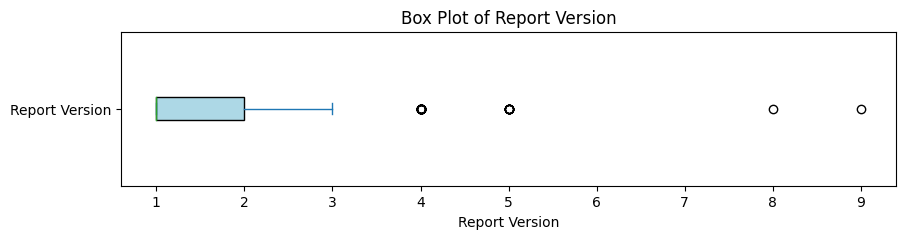

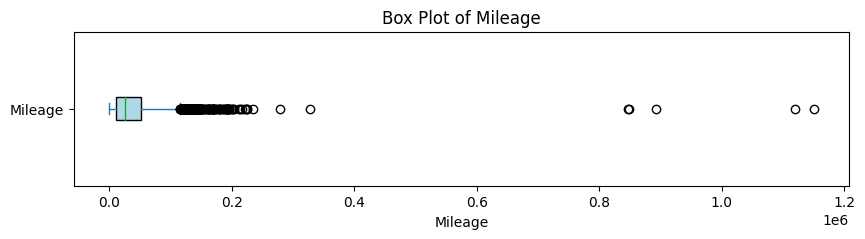

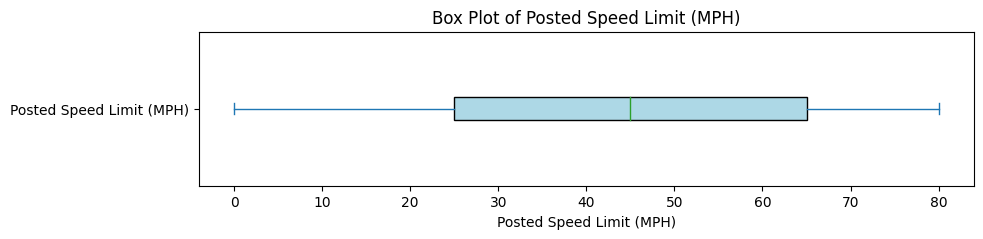

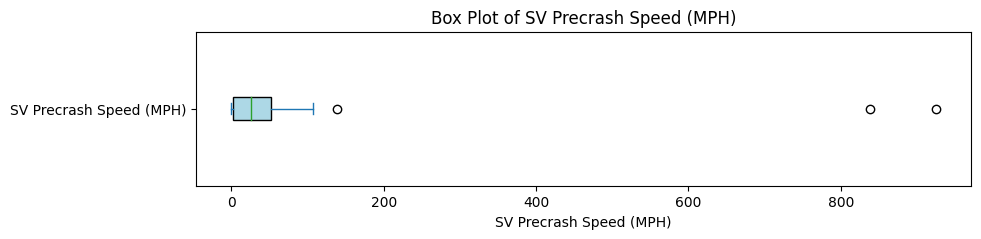

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Set pandas to display numbers in full without scientific notation
pd.options.display.float_format = '{:.6f}'.format

# Convert numerical columns to appropriate data types
numerical_columns = ['Report Version', 'Mileage', 'Posted Speed Limit (MPH)', 'SV Precrash Speed (MPH)']
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Generate a statistics summary table for numerical columns
stats_summary = data[numerical_columns].describe()

# Display the statistics summary as a formatted DataFrame
print("Statistics Summary:")
print(stats_summary.to_string())

# Create a PrettyTable for formatted output
table = PrettyTable()
table.field_names = ["Statistic"] + numerical_columns
for stat in stats_summary.index:
    table.add_row([stat] + stats_summary.loc[stat].tolist())

# Print the table
print(table)

# Plot box plots for numerical columns horizontally
for column in numerical_columns:
    plt.figure(figsize=(10, 2))
    data[column].dropna().plot.box(vert=False, grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()
